# Basic Linear Regression Implementation Diabetes Datasets


In [11]:
# Libraries
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import datasets 
import matplotlib.pyplot as plt

In [2]:
# utility functions

def traintest_split(x,y, train_per):
    
    """This function splits the x and y data into training and testings sets
    
    :param list x, y
    :returns x_train, x_test, y_train, y_test
    
    """
    
    x_shuffle = x.sample(frac = 1)
    msk = np.random.rand(len(x)) < train_per
    
    x_train = x_shuffle[msk]
    y_train = y[msk]
    x_test = x_shuffle[~msk]
    y_test = y[~msk]
    
    return np.asarray(x_train), np.asarray(x_test), np.asarray(y_train), np.asarray(y_test)

def weightUpdate(w,b,x,t):
    
    """
    This function computes the gradients
    
    Argument:
    w -- weight vector
    b -- bias term
    x -- feature matrix
    t -- label vector
    
    
    Returns:
    gradients for weights and bias
    """
    
    pred = np.dot(x,w) + b
    
    gradWeights = (1/len(x)) * np.sum(np.multiply((pred - t),x))
    gradBias = (1/len(x))*np.sum(pred - t)
    
    return gradWeights, gradBias

def cost(w,b,x,t):
    """
    This function computes the cost function
    
    Argument:
    w -- weight vector
    b -- bias term
    x -- feature matrix
    t -- label vector
    
    
    Returns:
    cost
    """
    
    cost = (1/2*len(x))*np.sum(np.square(np.dot(x,w) + b - t))
    
    return cost


def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.random.rand(dim,1)
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [3]:
# Q1

# Write a simple implementation of a least-squares solution to linear regression 
# that applies an iterative update to adjust the weights. Demonstrate the success 
# of your approach on the sample data loaded below, and visualize the best fit 
# plotted as a line (consider using linspace) against a scatter plot of the x 
# and y test values.

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


diabetes_X = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
diabetes_Y = diabetes.target.reshape(-1,1)


# Use only one feature
diabetes_X = diabetes_X.filter({'bmi'})

# Split data into training and testing sets

x_train, x_test, y_train, y_test = traintest_split(diabetes_X, diabetes_Y, 0.8)

In [4]:
diabetes_X.head()

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [8]:
# Set Training Parameters
dim = np.shape(x_train)[1]
w,b = initialize_with_zeros(dim)
epoch = 0
lr = 0.85
epoch = 0
set_epoch = 2000
n = []
c = []

for i in range(set_epoch):
    
    check_cost = cost(w,b,x_train,y_train)
    print('cost:', check_cost, 'epoch:', epoch)
    c.append(check_cost)
    n.append(epoch)
    
    w_update,b_update = weightUpdate(w,b,x_train, y_train)
    
    w = w - lr*w_update
    b = b - lr*b_update
    epoch = epoch + 1


cost: 1917445608.1848266 epoch: 0
cost: 412221810.762855 epoch: 1
cost: 378346489.34699553 epoch: 2
cost: 377575871.3117283 epoch: 3
cost: 377550125.2745137 epoch: 4
cost: 377541169.6198629 epoch: 5
cost: 377532622.7272581 epoch: 6
cost: 377524115.903058 epoch: 7
cost: 377515640.737623 epoch: 8
cost: 377507196.9279623 epoch: 9
cost: 377498784.3539018 epoch: 10
cost: 377490402.89980006 epoch: 11
cost: 377482052.45053554 epoch: 12
cost: 377473732.8914143 epoch: 13
cost: 377465444.10816693 epoch: 14
cost: 377457185.986947 epoch: 15
cost: 377448958.4143286 epoch: 16
cost: 377440761.2773059 epoch: 17
cost: 377432594.4632911 epoch: 18
cost: 377424457.86011237 epoch: 19
cost: 377416351.3560136 epoch: 20
cost: 377408274.83965147 epoch: 21
cost: 377400228.2000949 epoch: 22
cost: 377392211.3268228 epoch: 23
cost: 377384224.1097234 epoch: 24
cost: 377376266.43909186 epoch: 25
cost: 377368338.2056294 epoch: 26
cost: 377360439.30044144 epoch: 27
cost: 377352569.61503637 epoch: 28
cost: 377344729.04

In [9]:
trained_model = np.dot(x_train,w) + b
test_model = np.dot(x_test,w) + b

training_error = mean_squared_error(trained_model, y_train)
testing_error = mean_squared_error(test_model, y_test)

print('train error:', training_error)
print('test error:', testing_error)
print('Weights:', w)
print('Bias:', b)

train error: 5695.337572570129
test error: 6830.115624163556
Weights: [[-124.83142697]]
Bias: 152.71233046243321


Text(0.5, 0.98, 'Training Regression Model')

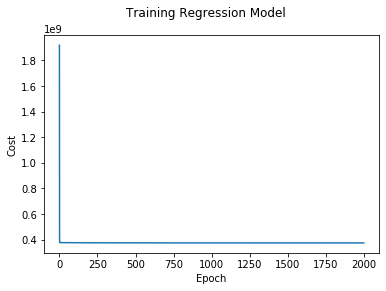

In [14]:
plt.plot(n,c)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.suptitle("Training Regression Model")